In [30]:
import pandas as pd
import PortfolioAnalyser as pa
import cufflinks as cf

In [31]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2000, 1, 1)
DFII10 = web.DataReader('DFII10', 'fred', start)
gold = web.DataReader('GOLDPMGBD228NLBM', 'fred', start)

In [32]:
gold.columns = ['GOLD']

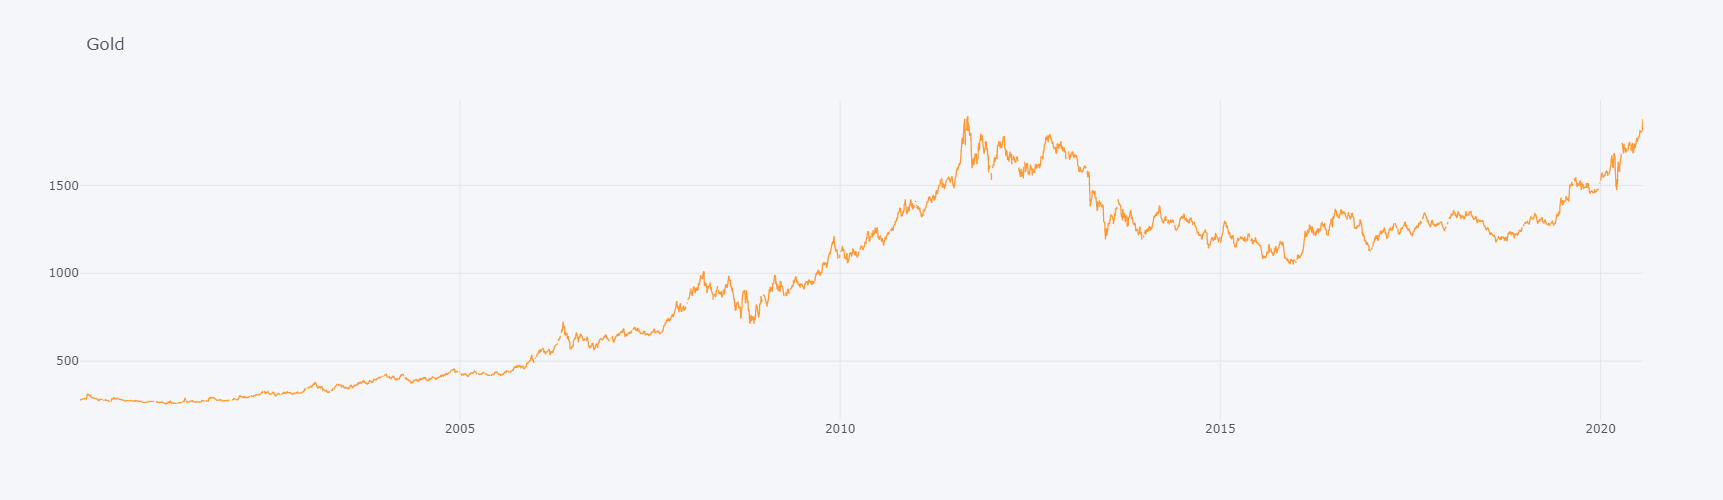

In [33]:
gold.iplot(dimensions=pa.dimensions, title='Gold')

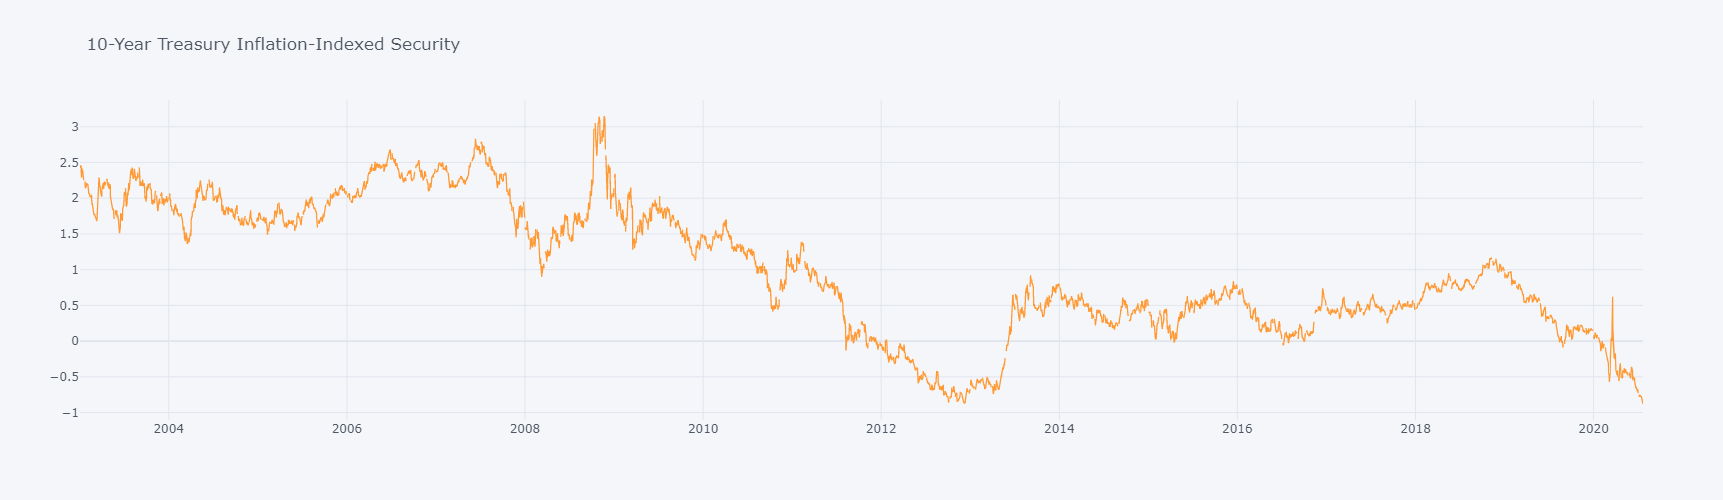

In [34]:
DFII10.iplot(dimensions=pa.dimensions, title='10-Year Treasury Inflation-Indexed Security')

In [35]:
data = pa.merge_time_series(DFII10, gold, how='inner').ffill()
pa.print_title('Data')
data

**Data**

,DFII10,GOLD
DATE,,
2003-01-02,2.43,343.80
2003-01-03,2.43,344.50
2003-01-06,2.46,351.75
2003-01-07,2.42,349.00
2003-01-08,2.29,349.75
...,...,...
2020-07-16,-0.79,"1,807.70"
2020-07-17,-0.82,"1,807.35"
2020-07-20,-0.84,"1,815.65"


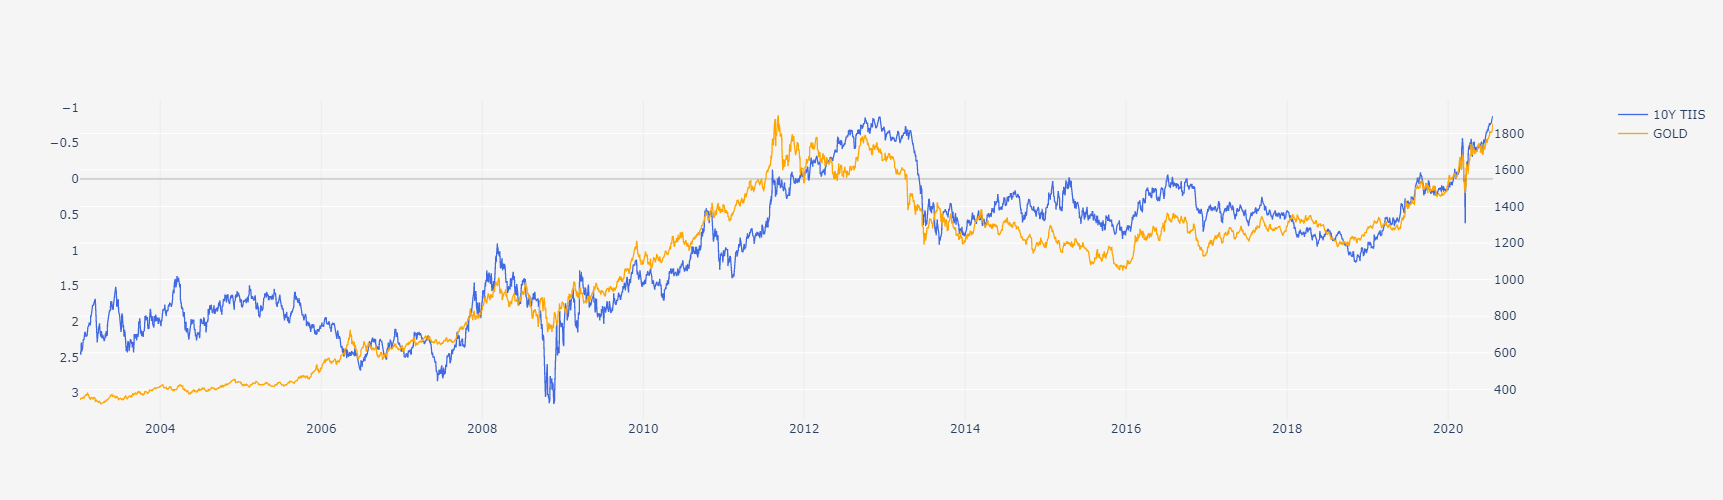

In [36]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data.index, y=data['DFII10'], name="10Y TIIS", line=dict(color = 'royalblue', width = 1.3)),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data.index, y=data['GOLD'], name="GOLD", line=dict(color = 'orange', width = 1.3)),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="",
    width=990,
    height=500,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    xaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),    
    yaxis=dict(
        title='',
        showgrid=False,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',
        autorange='reversed'

    )
)

# Set y-axes titles
fig.update_yaxes(title_text="", secondary_y=False)
fig.update_yaxes(title_text="", secondary_y=True)

fig.show()

In [37]:
data.to_csv('10y_TIIS_vs_GOLD.csv')

In [38]:
returns = data.pct_change().dropna()#.resample('W').last()

import numpy as np
returns = returns[~returns.isin([np.nan, np.inf, -np.inf]).any(1)]

pa.print_title('Returns in percentage')
returns * 100

**Returns in percentage**

,DFII10,GOLD
DATE,,
2003-01-03,0.00,0.20
2003-01-06,1.23,2.10
2003-01-07,-1.63,-0.78
2003-01-08,-5.37,0.21
2003-01-09,5.24,0.76
...,...,...
2020-07-16,2.60,0.17
2020-07-17,3.80,-0.02
2020-07-20,2.44,0.46


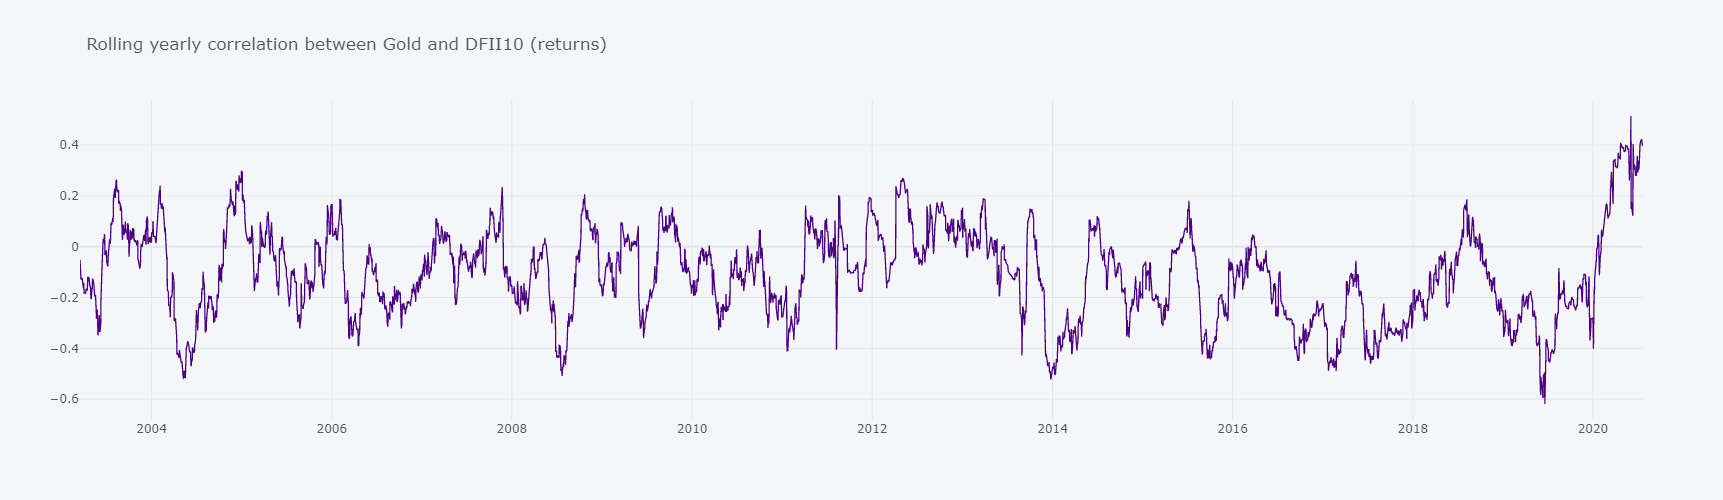

In [39]:
returns['GOLD'].rolling(52).corr(returns['DFII10']).dropna().iplot(dimensions=pa.dimensions, color='indigo', title='Rolling yearly correlation between Gold and DFII10 (returns)')

In [40]:
returns['GOLD'].rolling(52).corr(returns['DFII10']).dropna().to_csv('GOLD_DFII10_correlation.csv')

In [41]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF

In [42]:
start = datetime.datetime(2000, 1, 1)
M2V = web.DataReader('M2V', 'fred', start)
WALCL = web.DataReader('WALCL', 'fred', start)

data = pa.merge_time_series(M2V, WALCL, how='outer').ffill()

In [43]:
data = data.resample('Q').last()

In [44]:
data.to_csv('MV2_vs_WALCL.csv')

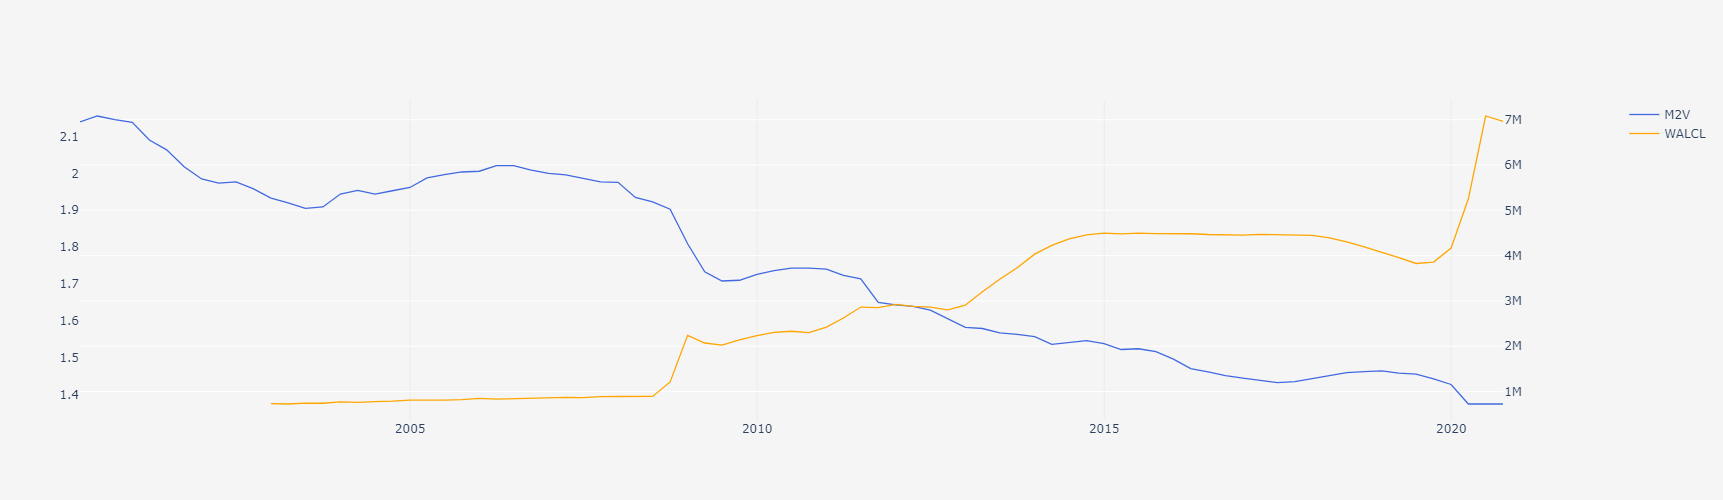

In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data.index, y=data['M2V'], name="M2V", line=dict(color = 'royalblue', width = 1.3)),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data.index, y=data['WALCL'], name="WALCL", line=dict(color = 'orange', width = 1.3)),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="",
    width=990,
    height=500,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    xaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),    
    yaxis=dict(
        title='',
        showgrid=False,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',

    )
)

# Set y-axes titles
fig.update_yaxes(title_text="", secondary_y=False)
fig.update_yaxes(title_text="", secondary_y=True)

fig.show()

In [46]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np

In [51]:
grangercausalitytests(returns, maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7201  , p=0.0992  , df_denom=4560, df_num=1
ssr based chi2 test:   chi2=2.7219  , p=0.0990  , df=1
likelihood ratio test: chi2=2.7211  , p=0.0990  , df=1
parameter F test:         F=2.7201  , p=0.0992  , df_denom=4560, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6210  , p=0.1978  , df_denom=4557, df_num=2
ssr based chi2 test:   chi2=3.2456  , p=0.1973  , df=2
likelihood ratio test: chi2=3.2445  , p=0.1975  , df=2
parameter F test:         F=1.6210  , p=0.1978  , df_denom=4557, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9663  , p=0.4076  , df_denom=4554, df_num=3
ssr based chi2 test:   chi2=2.9034  , p=0.4068  , df=3
likelihood ratio test: chi2=2.9025  , p=0.4069  , df=3
parameter F test:         F=0.9663  , p=0.4076  , df_denom=4554, df_num=3


{1: ({'ssr_ftest': (2.720089549907286, 0.09916133568154054, 4560.0, 1),
   'ssr_chi2test': (2.7218790825059096, 0.09898142792191879, 1),
   'lrtest': (2.721067589973245, 0.09903175852471909, 1),
   'params_ftest': (2.7200895499059494, 0.09916133568161253, 4560.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.6210286817471755, 0.19780920612601674, 4557.0, 2),
   'ssr_chi2test': (3.245614591235732, 0.1973439180144762, 2),
   'lrtest': (3.2444605995115126, 0.19745781749518765, 2),
   'params_ftest': (1.6210286817464803, 0.19780920612615474, 4557.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.9663108134618176, 0.40756804628114274, 4554.0, 3),
   'ssr_chi2test': (2.9033884191036563, 0.4067618847949409, 3),
   'lrtest': (2.902464708444313, 0.40690894716222026, 3),
   'params_ftest': (0.9663108134619997, 0.40756804628114274, 4554.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [

In [52]:
data = sm.datasets.macrodata.load_pandas()
data = data.data[['realgdp', 'realcons']].pct_change().dropna()
grangercausalitytests(data, maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=29.1600 , p=0.0000  , df=1
likelihood ratio test: chi2=27.2295 , p=0.0000  , df=1
parameter F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=38.9498 , p=0.0000  , df=2
likelihood ratio test: chi2=35.5873 , p=0.0000  , df=2
parameter F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=41.9812 , p=0.0000  , df=3
likelihood ratio test: chi2=38.0914 , p=0.0000  , df=3
parameter F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3


{1: ({'ssr_ftest': (28.72480341484925, 2.3081455830242645e-07, 198.0, 1),
   'ssr_chi2test': (29.160027709013633, 6.663994390982135e-08, 1),
   'lrtest': (27.229456246460586, 1.8068480152069365e-07, 1),
   'params_ftest': (28.72480341484923, 2.3081455830242944e-07, 198.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (18.988046084107506, 2.9209045472773863e-08, 195.0, 2),
   'ssr_chi2test': (38.94983812124617, 3.4845774070302762e-09, 2),
   'lrtest': (35.587256203442394, 1.8720847364547857e-08, 2),
   'params_ftest': (18.988046084107467, 2.9209045472774998e-08, 195.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (13.501476217751769, 4.961196622274045e-08, 192.0, 3),
   'ssr_chi2test': (41.981152614571904, 4.049246048504214e-09, 3),
   'lrtest': (38.091366257052414, 2.7033433661640424e-08, 3),
   'params_ftest': (13.501476217751764, 4.961196622274114e-08, 192.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0.,